# Intra-Class

> Examining the distribution within classes

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
import random

import torch.nn.functional as F

from fastai.vision.all import *

from similarity_learning.all import *

from Few_Shot_Feature_Space.utils import *

In [ ]:
def sample_pair(features_by_class, c=None):
    c = random.choice(list(features_by_class.keys())) if c is None else c
    return [features_by_class[c].centroid, random.choice(features_by_class[c])]

def intra_class_angles(features_by_class, n_samples=int(1e5)):
    dl = TfmdDL(range(n_samples),
                num_workers=0,
                after_item=lambda _: sample_pair(features_by_class),
                after_batch=lambda o: F.cosine_similarity(*o).arccos().rad2deg())
    return torch.cat(list(progress_bar(dl))).cpu()

def off_centroid_angles(features_by_class, n_plots=5, n_samples=int(1e5)):
    fig, axs = plt.subplots(1, n_plots, figsize=(n_plots*5, 5))
    fig.suptitle('Off Centroid Pairwise Angles')
    clusters = random.sample([ftrs for ftrs in features_by_class.values() if ftrs.size(0) > 100], n_plots)
    for ftrs, ax in zip(clusters, axs):
        points = list(ftrs.off_centroid_features)
        dl = TfmdDL(range(n_samples),
                    num_workers=0,
                    after_item=lambda _: random.sample(points, 2),
                    after_batch=lambda o: F.cosine_similarity(*o).arccos().rad2deg())
        plot_hist(torch.cat(list(progress_bar(dl))).cpu(), ax=ax)

def intra_class_hist(dl, fe, c=None):
    class_ftrs = ClassFeatures.compute(dl, fe, min_samples=30)
    angles = intra_class_angles(class_ftrs)
    ax = plot_hist(angles)
    ax.set_title('Angles From Centroid')

    off_centroid_angles(class_ftrs)

In [ ]:
vggface2_fe, casia_webface_fe = fr_feature_extractors()
lfw_dl, pfr_dl = fr_dataloaders()

## VGGFace2

### LFW

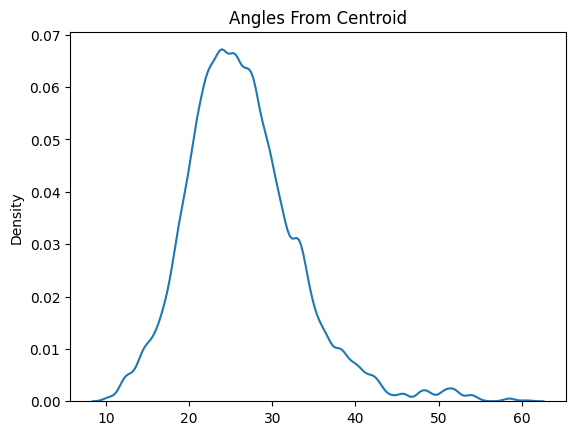

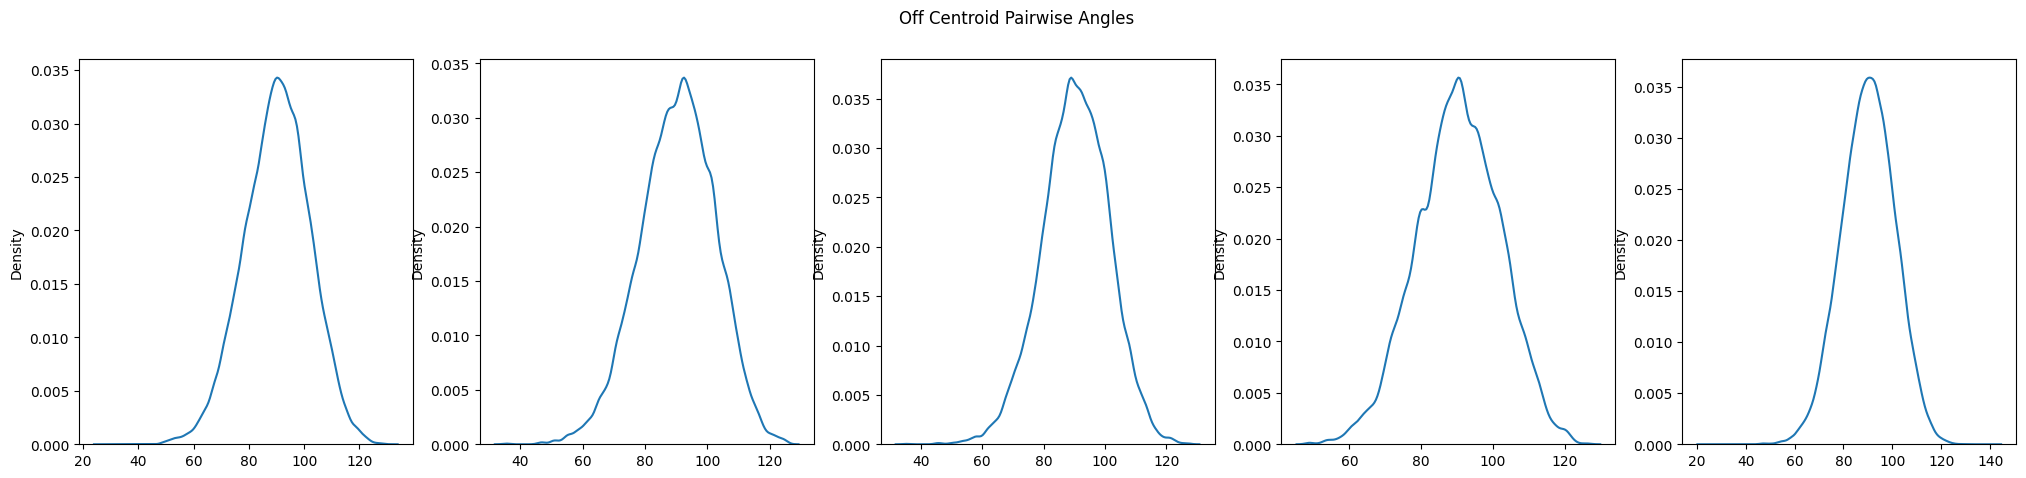

In [ ]:
intra_class_hist(lfw_dl, vggface2_fe)

### PFR

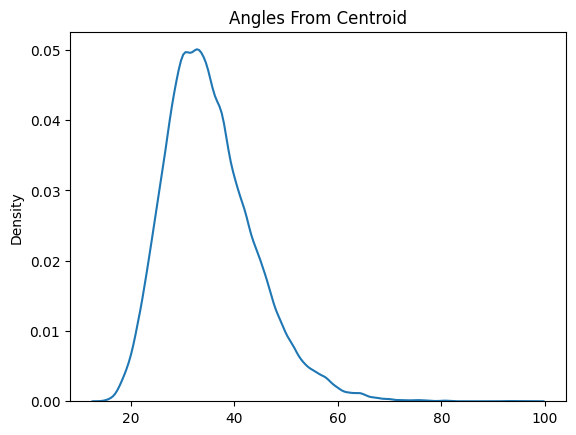

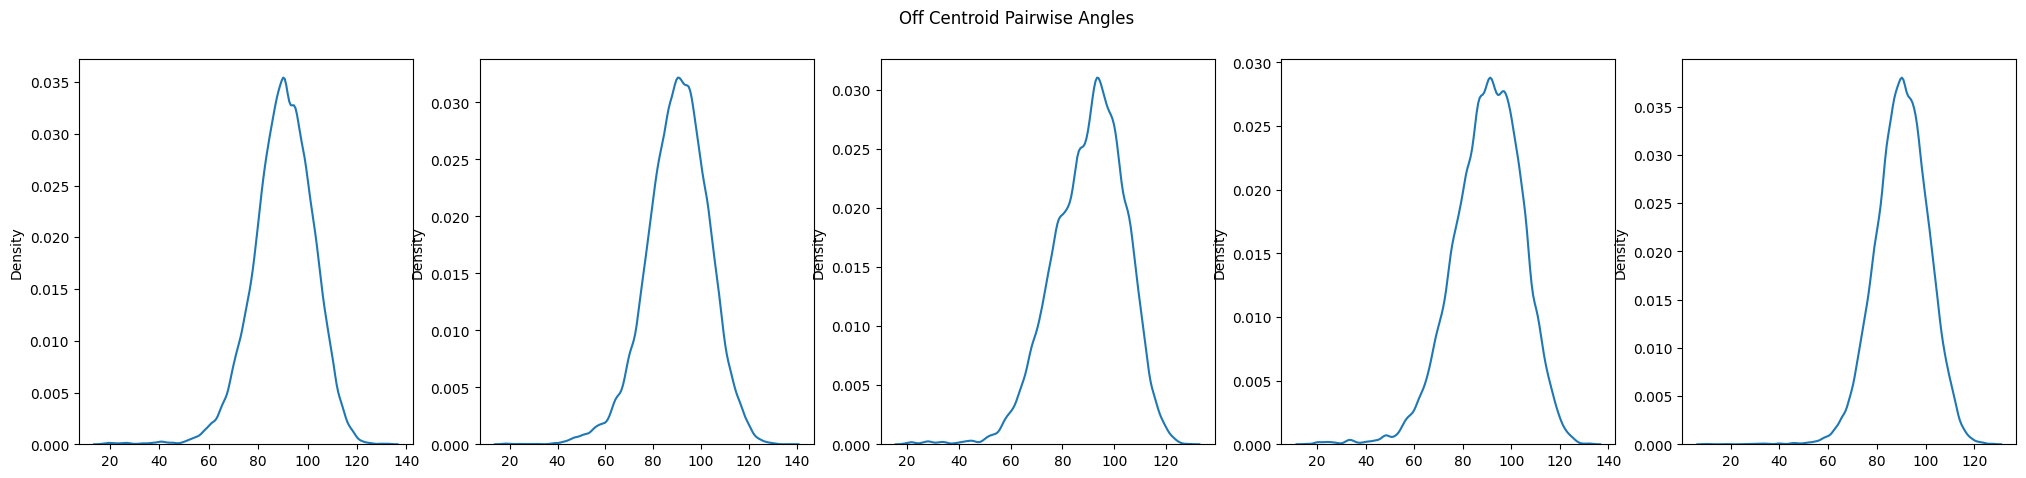

In [ ]:
intra_class_hist(pfr_dl, vggface2_fe)

## CASIA-WebFace

### LFW

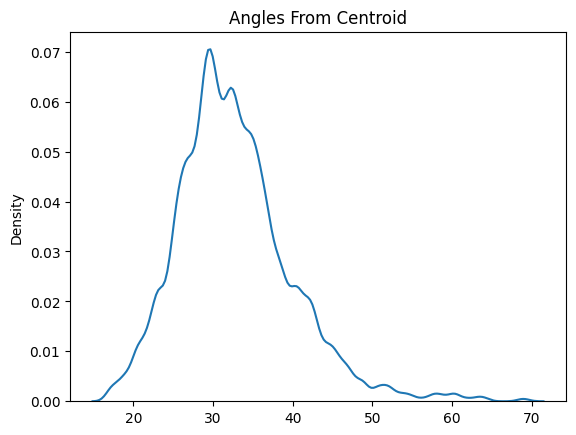

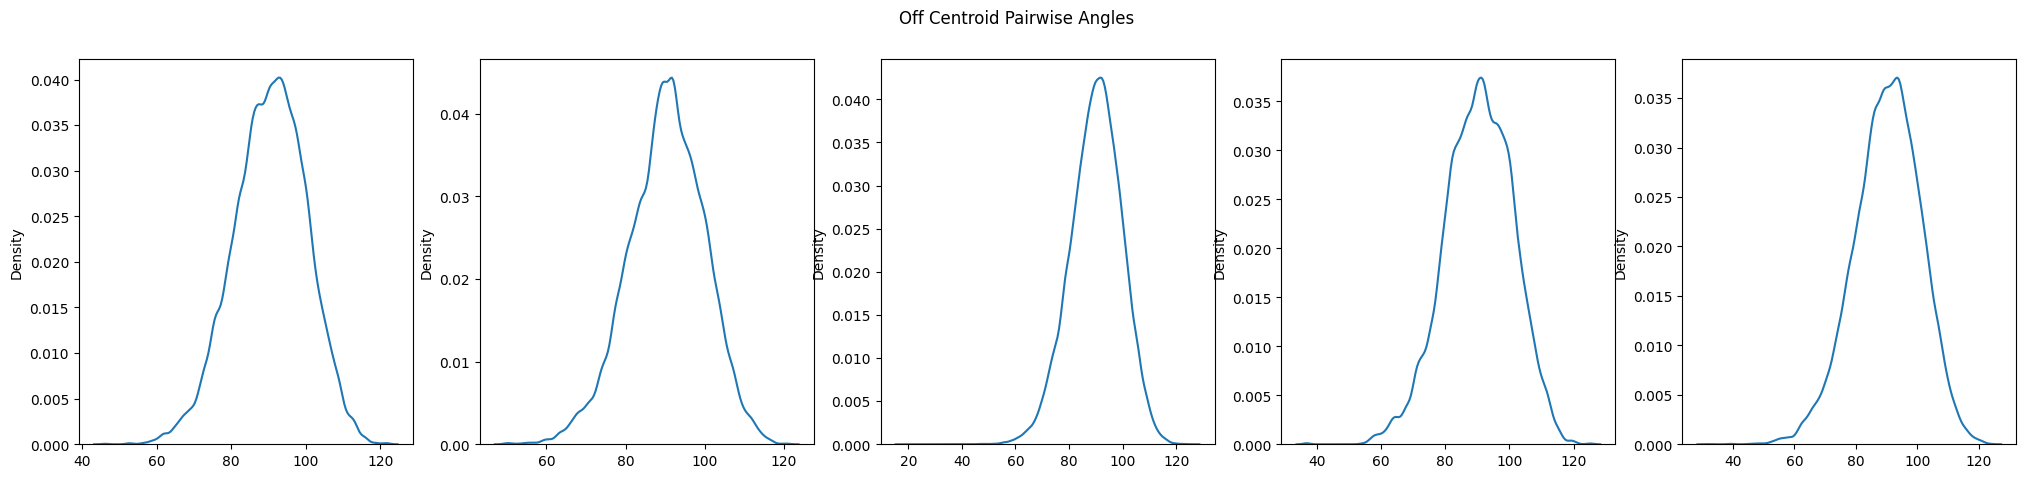

In [ ]:
intra_class_hist(lfw_dl, casia_webface_fe)

### PFR

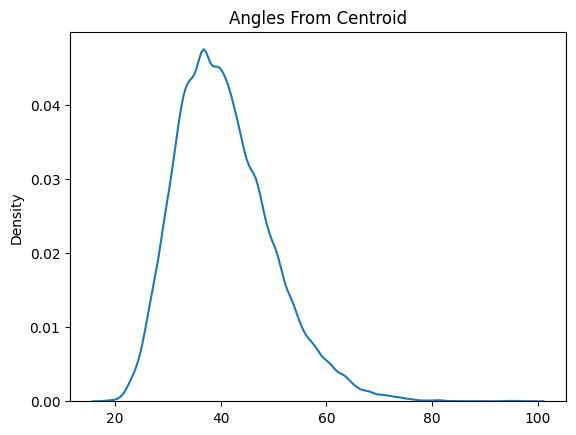

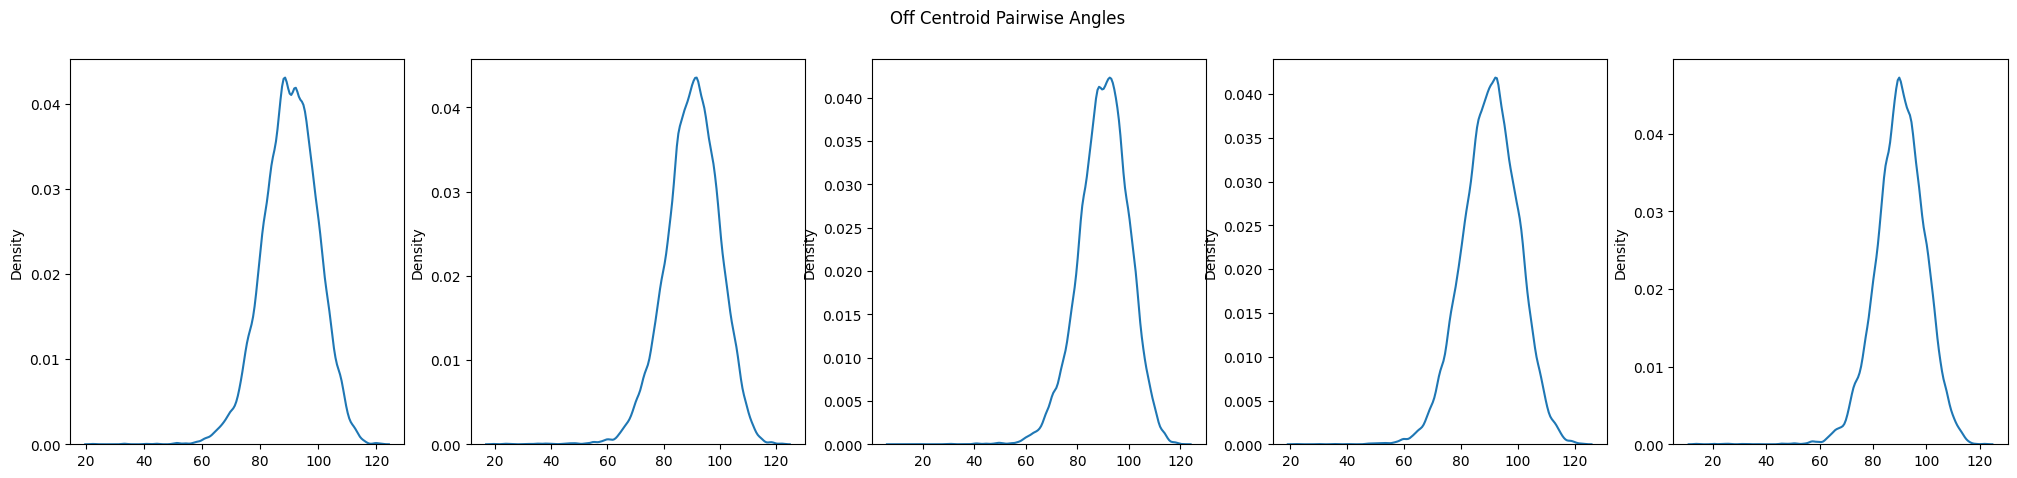

In [ ]:
intra_class_hist(pfr_dl, casia_webface_fe)